## Keras example: mnist analysis by DL (CV2D)

In [1]:
%%time
from keras.datasets import mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

Using TensorFlow backend.


CPU times: user 1.03 s, sys: 551 ms, total: 1.58 s
Wall time: 1.04 s


In [2]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

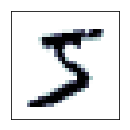

In [4]:
plt.figure(figsize=(2, 2))
plt.imshow(X_train0[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

### Show images of numbers

In [5]:
# 추가 사항
import numpy as np
# import matplotlib as mpl
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

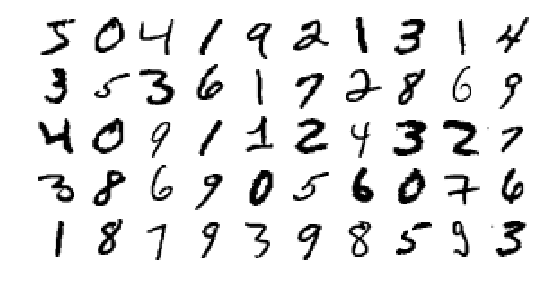

In [6]:
plt.figure(figsize=(9,9))
example_images = np.r_[X_train0[:50]]
plot_digits(example_images, images_per_row=10)

plt.show()

### 데이터를 float 타입으로 바꾸고 스케일링한다.

In [7]:
X_train = X_train0.reshape(60000, 28, 28, 1).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 28, 28, 1).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

(60000, 28, 28, 1) float32


### y 데이터는 One-Hot-Encoding 을 한다.

In [8]:
y_train0[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

***

## 신경망 구현 순서

### Keras 를 사용하면 다음과 같은 순서로 신경망을 구성할 수 있다.

1. Sequential 모형 클래스 객체 생성
2. add 메서드로 layer 추가.
    - Dense layer 가 가장 일반적인 신경망
    - 입력단부터 순차적으로 추가한다.
    - 레이어는 출력 뉴런 갯수를 첫번째 인수로 받는다.
    - 최초의 레이어는 input_dim 인수로 입력 크기를 설정해야 한다.
    - activation 인수로 activation 함수 설정
3. compile 메서드로 모형 완성.
    - loss인수로 Loss 함수 설정
    - optimizer 인수로 최적화 알고리즘 설정
    - metrics 인수로 트레이닝 단계에서 기록할 성능 기준 설정
4. fit 메서드로 트레이닝
    - nb_epoch 로 epoch 횟수 설정
    - batch_size 로 mini batch size 설정
    - metrics 인수로 설정한 성능 기준 기록을 출력으로 반환
    - Jupyter Notebook을 사용할 때는 verbose=2로 설정하여 progress bar 가 나오지 않도록 설정한다.

In [10]:
from keras.optimizers import SGD
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [11]:
# Deep Learning model
np.random.seed(0)

# Simple NN
# model = Sequential()
# model.add(Dense(15, input_dim=784, activation="sigmoid"))  # firsr layer
# model.add(Dense(10, activation="sigmoid")) # output layer
# model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

# 컨볼루션 신경망의 설정
model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), input_dim=784, activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

> 만들어진 모형은 model_to_dot 명령이나 summary 명령으로 모델 내부의 layers 리스트를 살펴봄으로써 내부 구조를 확인할 수 있다.

In [12]:
# !pip install pydot

In [13]:
# !pip install GraphViz

In [14]:
import pydot
import graphviz

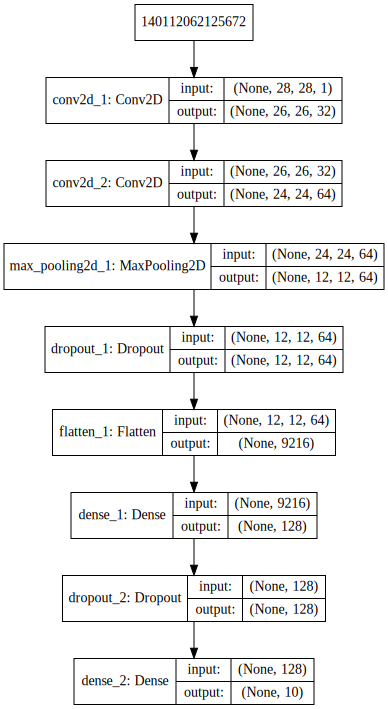

In [15]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [16]:
from keras.utils import plot_model
plot_model(model, to_file='model_DL.png')

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [18]:
l1 = model.layers[0]
l2 = model.layers[1]
l6 = model.layers[5]

In [19]:
l1.name, type(l1), l1.output_shape, l1.activation.__name__, l1.count_params()

('conv2d_1',
 keras.layers.convolutional.Conv2D,
 (None, 26, 26, 32),
 'relu',
 320)

In [20]:
l2.name, type(l2), l2.output_shape, l2.activation.__name__, l2.count_params()

('conv2d_2',
 keras.layers.convolutional.Conv2D,
 (None, 24, 24, 64),
 'relu',
 18496)

In [21]:
l6.name, type(l6), l6.output_shape, l6.activation.__name__, l6.count_params()

('dense_1', keras.layers.core.Dense, (None, 128), 'relu', 1179776)

## fit 메서드로 트레이닝

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
%%time
hist = model.fit(X_train, Y_train, 
                 epochs=30, batch_size=100, 
                 validation_data=(X_test, Y_test), 
                 verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 87us/step - loss: 0.2301 - acc: 0.9302 - val_loss: 0.0499 - val_acc: 0.9843
Epoch 2/30
60000/60000 [==============================] - 3s 57us/step - loss: 0.0838 - acc: 0.9749 - val_loss: 0.0355 - val_acc: 0.9880
Epoch 3/30
60000/60000 [==============================] - 3s 58us/step - loss: 0.0624 - acc: 0.9811 - val_loss: 0.0350 - val_acc: 0.9889
Epoch 4/30
60000/60000 [==============================] - 3s 58us/step - loss: 0.0512 - acc: 0.9842 - val_loss: 0.0310 - val_acc: 0.9901
Epoch 5/30
60000/60000 [==============================] - 3s 58us/step - loss: 0.0428 - acc: 0.9863 - val_loss: 0.0296 - val_acc: 0.9906
Epoch 6/30
60000/60000 [==============================] - 4s 59us/step - loss: 0.0390 - acc: 0.9877 - val_loss: 0.0300 - val_acc: 0.9904
Epoch 7/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.0347 - acc: 0.9895 - val_loss: 0.0274 - val_acc

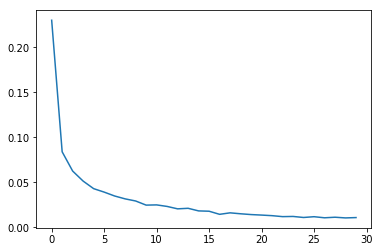

In [24]:
# Plot performance
plt.plot(hist.history['loss'])
plt.show()

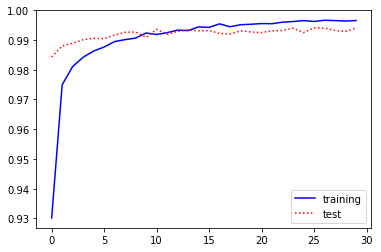

In [25]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

## 가중치 정보

> 트레이닝이 끝난 모형의 가중치 정보는 get_weights 메서드로 구할 수 있다. 이 메서드는 w 값과 b 값을 출력한다.

In [26]:
w1 = l1.get_weights()
w1[0].shape, w1[1].shape

((3, 3, 1, 32), (32,))

In [27]:
w2 = l2.get_weights()
w2[0].shape, w2[1].shape

((3, 3, 32, 64), (64,))

## 모형의 사용

> 트레이닝이 끝난 모형은 predict 메서드로 y 값을 출력하거나 출력된 y값을 각 클래스에 대한 판별함수로 가정하고 predict_classes 메서드로 classification을 할 수 있다.

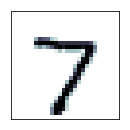

In [28]:
plt.figure(figsize=(2, 2))
plt.imshow(X_test0[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [29]:
model.predict(X_test[:1, :])

array([[3.4677843e-21, 6.1737367e-16, 1.6643286e-16, 8.9145983e-16,
        7.5764206e-20, 2.7839409e-17, 7.8670017e-27, 1.0000000e+00,
        5.5408079e-20, 3.8558308e-15]], dtype=float32)

In [30]:
model.predict_classes(X_test[:1, :], verbose=0)

array([7])

## DL 모형의 저장

>  트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장하였다가 나중에 load 명령으로 불러 사용할 수 있다.

In [31]:
model.save('my_model_dl.hdf5')
# del model

In [32]:
from keras.models import load_model

model2 = load_model('my_model_dl.hdf5')
model2.predict_classes(X_test[:1, :], verbose=0)

array([7])

In [33]:
model2.predict_classes(X_test[:10, :], verbose=0)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [34]:
y_test0[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

### 테스트 데이터에 대한 예측 정확도 계산 

In [35]:
# Correct prediction
model2.predict_classes(X_test[8:9, :], verbose=1)

1/1 [==============================] - 0s 3ms/step


array([5])

In [36]:
y_test0[8]

5

In [37]:
x_pred = model2.predict_classes(X_test, verbose=1)

10000/10000 [==============================] - 0s 33us/step


In [38]:
t_count = np.sum(x_pred==y_test0) # True positive
f_count = np.sum(x_pred!=y_test0) # False positive
f_count==10000-t_count

True

In [39]:
t_count,f_count

(9940, 60)

In [40]:
accuracy = t_count/10000*100
accuracy

99.4

## DL is great!!!